# Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Instantiating Constants

In [5]:
## Path of Image
path = "assets/6F--38-_jpg.rf.67a5837c75b5dc33b49f278314a393a5.jpg"

## Final Image Size
final_image_size= 224

# Soil Image Processing

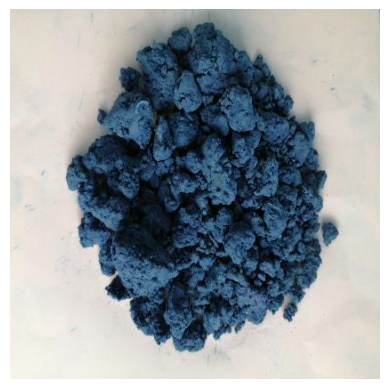

In [6]:
## Load Image
img = cv2.imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()

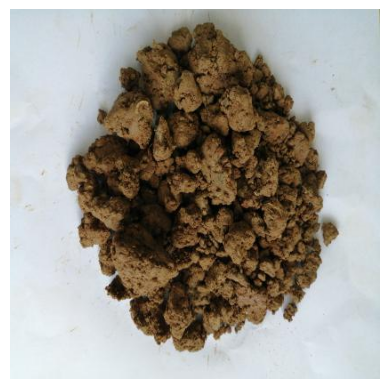

In [7]:
## Convert image to RGB for better presentation 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
## Creating copy of image for later use
orig_img = img.copy()

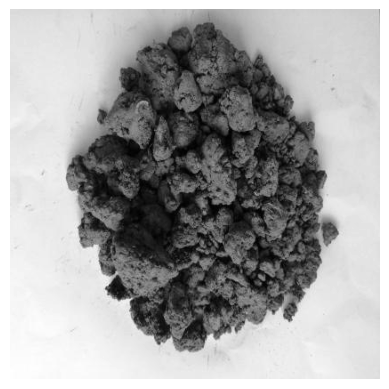

In [11]:
## Convert image to RGB for thresholding purposes
## for conducting thresholding
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()

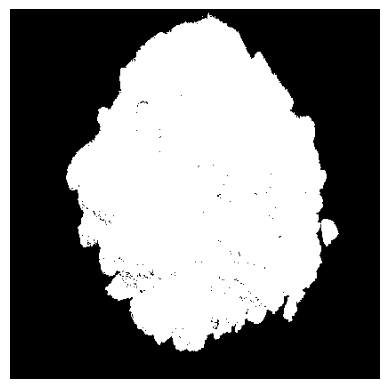

In [13]:
## Applying Otsu's method for thresholding with inversed binary
ret, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(bin_img,cmap='gray')
plt.axis('off')
plt.show()

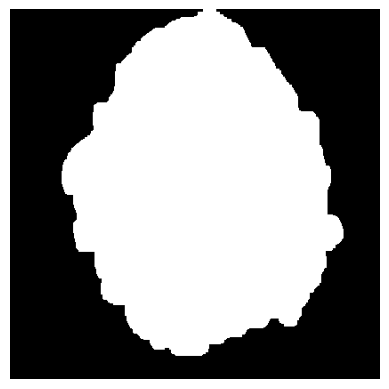

In [14]:
## Applying morphological operations 
## For noise removal on the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel, iterations=7)
bin_img = cv2.dilate(bin_img, kernel, iterations=5)
plt.imshow(bin_img,cmap='gray')
plt.axis('off')
plt.show()

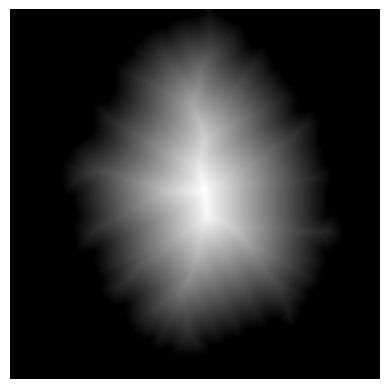

In [15]:
## Applying distance transform on the cleaned threshold image
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
plt.imshow(dist,cmap='gray')
plt.axis('off')
plt.show()

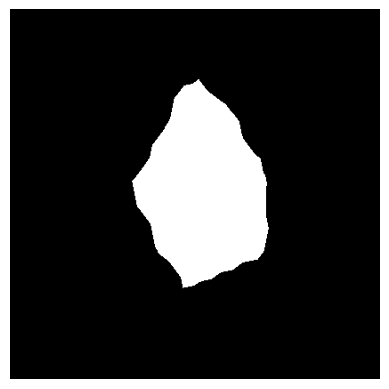

In [16]:
# Foreground area
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
plt.imshow(sure_fg, cmap='gray')
plt.axis('off')
plt.show()

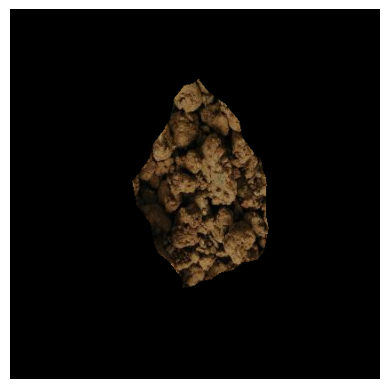

In [17]:
## Apply the mask to the original image to extract the foreground
## using the copy of the original image
region = cv2.bitwise_and(orig_img, orig_img, mask=sure_fg)
plt.imshow(region)
plt.axis('off')
plt.show()

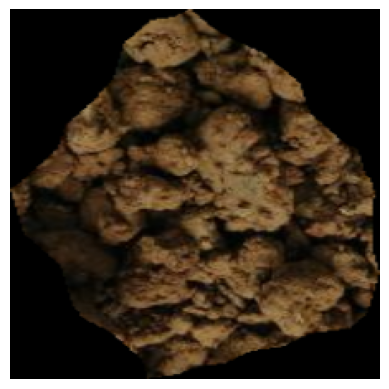

In [18]:
## Applying selective cropping on the image to remove background
## and also resizing the iamge
non_zero_coords = np.argwhere(region > 0)
min_y, min_x, _ = non_zero_coords.min(axis=0)
max_y, max_x, _ = non_zero_coords.max(axis=0)
cropped_region = region[min_y:max_y + 1, min_x:max_x + 1]
cropped_region = cv2.resize(cropped_region, (final_image_size, final_image_size))
plt.imshow(cropped_region)
plt.axis('off')
plt.show()

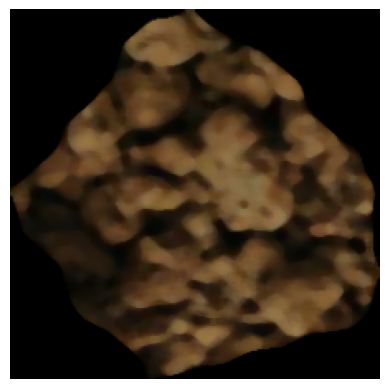

In [19]:
## Spliting the image and applying median blur to each channel
## Before merging the image again
rgb_planes = cv2.split(cropped_region)
result_planes = []
for plane in rgb_planes:
    processed_image = cv2.medianBlur(plane, 7) 
    result_planes.append(processed_image)
result = cv2.merge(result_planes)
plt.imshow(result)
plt.axis('off')
plt.show()

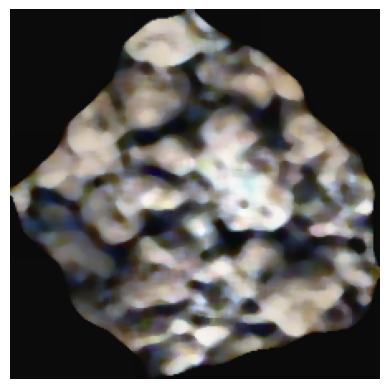

In [20]:
## Splitting the image and applying CLAHE to each channel
## before meging the image again
rgb_planes = cv2.split(result)
result_planes=[]
clahe = cv2.createCLAHE(tileGridSize=(3,3),clipLimit=10)
for plane in rgb_planes:
    processed_image = clahe.apply(plane) 
    result_planes.append(processed_image)

result = cv2.merge(result_planes)
plt.imshow(result)
plt.axis('off')
plt.show()

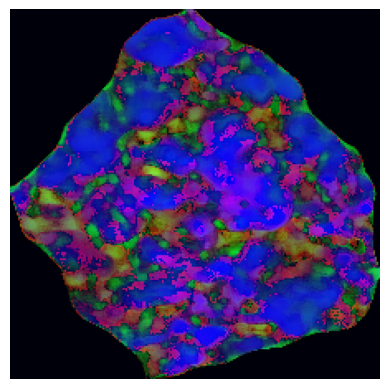

In [21]:
## Converting the image to HSV color space
## To better attenuate the correletion between soil acidity and pixel value
hsv = cv2.cvtColor(result,cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.axis('off')
plt.show()

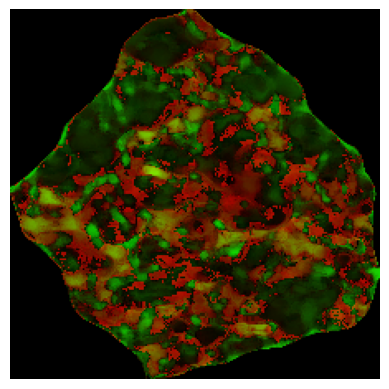

In [22]:
## Setting value channel to zero 
## because it has no significant correlation to soil acidity
h,s,v = cv2.split(hsv)
v *= 0
HS = cv2.merge([h,s,v])
plt.imshow(HS)
plt.axis('off')
plt.show()